In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
import os
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
import glob

images = [cv2.imread(file) for file in glob.glob('/content/images/*.jpg')]

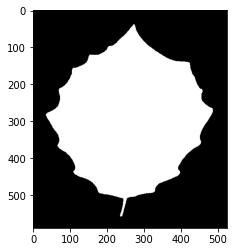

In [ ]:
plt.imshow(images[5])

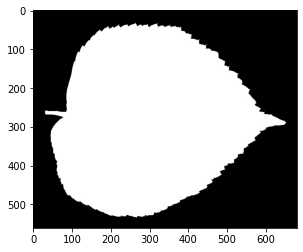

In [ ]:
plt.imshow(images[150])

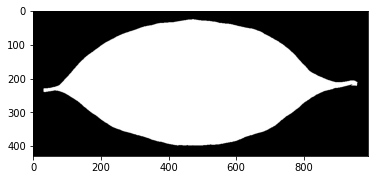

In [ ]:
plt.imshow(images[1000])

In [3]:
data=pd.read_csv('/content/train.csv')
data.drop(columns='id',axis=1,inplace=True)
data.shape

(990, 193)

In [4]:
data.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [5]:
data.drop_duplicates(keep='first',inplace=True)

In [6]:
data.species.value_counts()

Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64

In [7]:
data.isna().sum()

species      0
margin1      0
margin2      0
margin3      0
margin4      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64

In [8]:
data.isna().sum().sum()

0

In [9]:
X=data.drop(columns='species',axis=1)
y=data['species']

In [10]:
X.corr()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
margin1,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,0.397138,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,0.162587,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,0.008772,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,-0.173986,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
margin5,-0.475874,-0.444312,-0.185007,0.029480,1.000000,-0.438587,-0.108178,0.056557,0.196745,-0.320647,...,-0.165622,0.059135,0.012938,0.155327,0.149420,0.006542,-0.109229,0.151675,0.022299,-0.148834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,0.020376,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,-0.127373,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,-0.014200,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,-0.039193,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


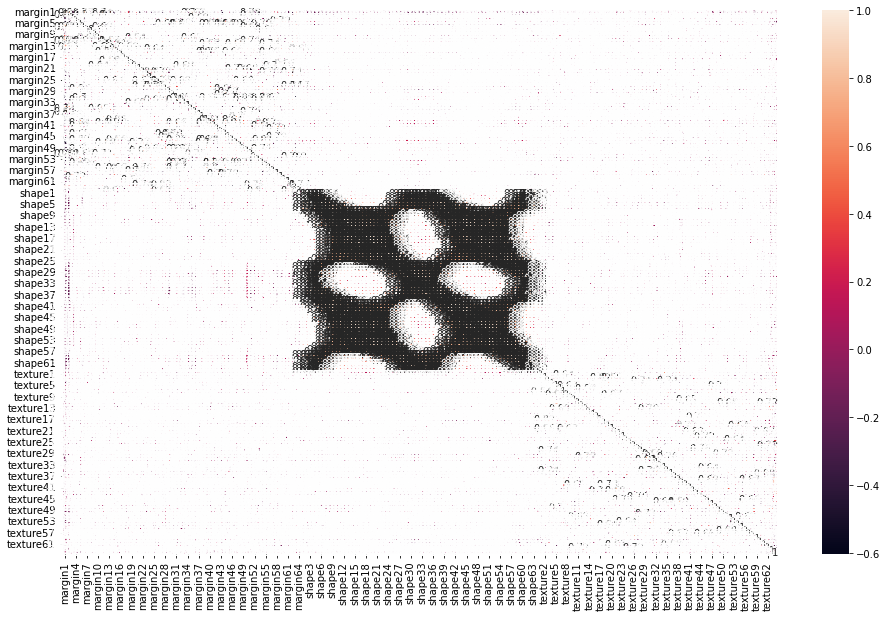

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(),annot=True)
plt.show()

In [15]:
print(X.margin8.value_counts())
print('---------16----------------')
print(X.margin16.value_counts())
print('----------23---------------')
print(X.margin23.value_counts())
print('-----------34--------------')
print(X.margin34.value_counts())
print('-----------52--------------')
print(X.margin52.value_counts())
print('----------texture12---------------')
print(X.texture12.value_counts())
print('------------15-------------')
print(X.texture15.value_counts())
print('------------18-------------')
print(X.texture18.value_counts())
print('------------21-------------')
print(X.texture21.value_counts())
print('------------36-------------')
print(X.texture36.value_counts())
print('------------52-------------')
print(X.texture52.value_counts())
print('-----------60--------------')
print(X.texture60.value_counts())
print('-----------61--------------')
print(X.texture61.value_counts())
print('-------------------------')

0.000000    805
0.005859     91
0.003906     50
0.007812     20
0.001953     16
0.031250      2
0.013672      2
0.015625      2
0.017578      2
Name: margin8, dtype: int64
---------16----------------
0.000000    977
0.007812      4
0.005859      4
0.015625      2
0.001953      1
0.009766      1
0.011719      1
Name: margin16, dtype: int64
----------23---------------
0.000000    909
0.005859     16
0.007812     11
0.001953      9
0.003906      8
0.025391      4
0.013672      4
0.009766      4
0.015625      4
0.019531      4
0.027344      3
0.011719      3
0.017578      2
0.023438      2
0.035156      2
0.033203      1
0.021484      1
0.031250      1
0.039062      1
0.029297      1
Name: margin23, dtype: int64
-----------34--------------
0.000000    687
0.001953    173
0.003906     66
0.007812     31
0.005859     27
0.013672      2
0.011719      2
0.009766      1
0.015625      1
Name: margin34, dtype: int64
-----------52--------------
0.000000    635
0.001953    156
0.003906     57
0.005

In [18]:
X.drop(columns=['margin8','margin16','margin23','texture15','texture21','texture36','texture61'],axis=1,inplace=True)

In [19]:
X.shape

(990, 185)

In [20]:
print(y.head())
print('------------------------------')
print(y.shape)
print('------------------------------')
print(y.value_counts())

0              Acer_Opalus
1    Pterocarya_Stenoptera
2     Quercus_Hartwissiana
3          Tilia_Tomentosa
4       Quercus_Variabilis
Name: species, dtype: object
------------------------------
(990,)
------------------------------
Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64


In [21]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
y=lbl.fit_transform(y)

In [22]:
y=pd.DataFrame(y)


In [23]:
print(y.shape)

(990, 1)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111, shuffle =True)

In [ ]:
n_features = X_train.shape[1]

In [38]:
def training(batch_size,drop_out,lambda_reg,lr,hidden_size,n_epochs):
  model=Sequential()
  model.add(keras.layers.Flatten())
  model.add(Dense(hidden_size,activation='tanh'))
  model.add(Dropout(drop_out))
  model.add(Dense(99,activation='softmax'))
  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=n_epochs,batch_size=batch_size)
  acc = history.history['accuracy']
  loss = history.history['loss']
  plt.subplot(1, 2, 1)
  plt.plot(acc)
  plt.subplot(1, 2, 1)
  plt.plot(loss)
  plt.title('model loss & accuracy')
  plt.show()
  print(model.evaluate(X_test, y_test, verbose=1))

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 4.5693 - accuracy: 0.0442
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 4.3258 - accuracy: 0.1503
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 3.7937 - accuracy: 0.2323
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 3.1993 - accuracy: 0.3409
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 2.6782 - accuracy: 0.4811
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 2.2602 - accuracy: 0.5606
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.9178 - accuracy: 0.6288
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 1.6638 - accuracy: 0.7399
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4103 - accuracy: 0.7942
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 1.2212 - accuracy: 0.8283
Epoch 11/

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


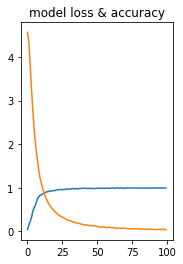

7/7 [==============================] - 0s 3ms/step - loss: 0.2591 - accuracy: 0.9242
[0.2590556740760803, 0.9242424368858337]


In [40]:
training(32,0.1,0,0.01,20,100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 4.5800 - accuracy: 0.0316
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 4.4576 - accuracy: 0.1553
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 4.2247 - accuracy: 0.2374
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 3.8596 - accuracy: 0.2740
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 3.4518 - accuracy: 0.3295
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 3.0528 - accuracy: 0.4104
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 2.6999 - accuracy: 0.4937
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 2.4017 - accuracy: 0.5758
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 2.1535 - accuracy: 0.6048
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 1.9216 - accuracy: 0.6818
Epoch 11/

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


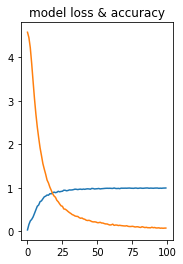

7/7 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9495
[0.23053793609142303, 0.9494949579238892]
Epoch 1/100
7/7 [==============================] - 0s 4ms/step - loss: 4.5883 - accuracy: 0.0391
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 4.5330 - accuracy: 0.1225
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 4.4491 - accuracy: 0.1793
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 4.3174 - accuracy: 0.2664
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 4.1412 - accuracy: 0.3131
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 3.9133 - accuracy: 0.3712
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 3.6572 - accuracy: 0.3889
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 3.3926 - accuracy: 0.3952
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 3.1439 - accuracy: 0.4154


<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


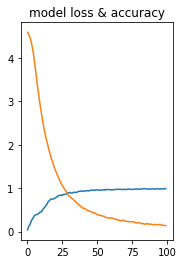

7/7 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 0.9141
[0.34025588631629944, 0.9141414165496826]
Epoch 1/100
4/4 [==============================] - 0s 6ms/step - loss: 4.5908 - accuracy: 0.0189
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 4.5587 - accuracy: 0.0795
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 4.5228 - accuracy: 0.0568
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 4.4756 - accuracy: 0.0581
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 4.4145 - accuracy: 0.0669
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 4.3333 - accuracy: 0.0896
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 4.2375 - accuracy: 0.1389
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 4.1283 - accuracy: 0.1856
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 4.0035 - accuracy: 0.2285


<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


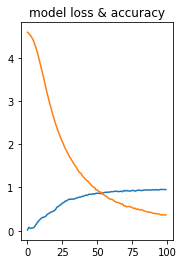

7/7 [==============================] - 0s 3ms/step - loss: 0.5196 - accuracy: 0.8889
[0.5195821523666382, 0.8888888955116272]


In [41]:
batch_sizes=[64,128,256]
for i in batch_sizes:
  training(i,0.1,0,0.01,20,100)

Epoch 1/100
13/13 [==============================] - 1s 6ms/step - loss: 4.5913 - accuracy: 0.0126
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 4.5353 - accuracy: 0.0934
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 4.4212 - accuracy: 0.1313
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 4.2229 - accuracy: 0.1705
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 3.9613 - accuracy: 0.1919
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 3.6909 - accuracy: 0.1970
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 3.4298 - accuracy: 0.2639
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 3.1785 - accuracy: 0.3068
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 2.9758 - accuracy: 0.3144
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 2.8056 - accuracy: 0.3838
Epoch 11/

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


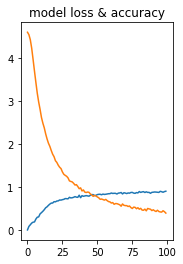

7/7 [==============================] - 0s 3ms/step - loss: 0.5716 - accuracy: 0.8384
[0.5715888738632202, 0.8383838534355164]
Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5861 - accuracy: 0.0278
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 4.4842 - accuracy: 0.1225
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 4.2745 - accuracy: 0.2058
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 3.9182 - accuracy: 0.2109
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 3.4938 - accuracy: 0.2715
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 3.0819 - accuracy: 0.3687
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 2.7171 - accuracy: 0.4558
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 2.4057 - accuracy: 0.5543
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 2.1458 - 

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


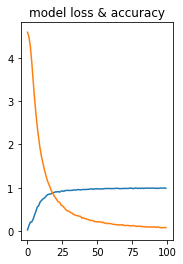

7/7 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.9293
[0.2823597490787506, 0.9292929172515869]
Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5775 - accuracy: 0.0366
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 4.4194 - accuracy: 0.1982
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 4.1068 - accuracy: 0.2677
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 3.6590 - accuracy: 0.3245
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 3.1955 - accuracy: 0.3763
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 2.7308 - accuracy: 0.4621
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 2.3538 - accuracy: 0.5543
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 2.0381 - accuracy: 0.6389
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 1.7472 - 

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


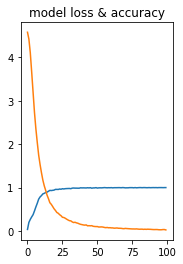

7/7 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9596
[0.2094876617193222, 0.9595959782600403]
Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5656 - accuracy: 0.0694
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 4.3572 - accuracy: 0.2765
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 3.9484 - accuracy: 0.3712
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 3.3670 - accuracy: 0.4318
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 2.7846 - accuracy: 0.5088
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 2.3100 - accuracy: 0.5871
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 1.9073 - accuracy: 0.6881
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 1.5830 - accuracy: 0.7639
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 1.3438 - 

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


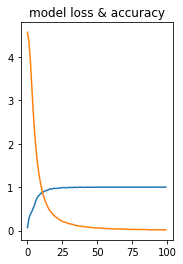

7/7 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9343
[0.22003155946731567, 0.9343434572219849]


In [42]:
hidden_sizes=[10,20,30,40]
for i in hidden_sizes:
  training(64,0.1,0,0.01,i,100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 4.5790 - accuracy: 0.0366
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 4.4539 - accuracy: 0.1326
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 4.2041 - accuracy: 0.1730
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 3.8332 - accuracy: 0.2437
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 3.4270 - accuracy: 0.3308
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 3.0287 - accuracy: 0.3990
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 2.6705 - accuracy: 0.4583
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 2.3666 - accuracy: 0.5556
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 2.1020 - accuracy: 0.6616
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 1.8754 - accuracy: 0.7449
Epoch 11/

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


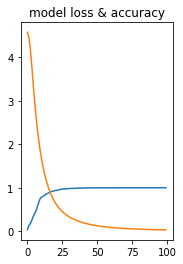

7/7 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.9192
[0.27556705474853516, 0.9191918969154358]
Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5802 - accuracy: 0.0227
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 4.4656 - accuracy: 0.1439
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 4.2460 - accuracy: 0.2765
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 3.8833 - accuracy: 0.3586
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 3.4508 - accuracy: 0.3737
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 3.0339 - accuracy: 0.4230
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 2.6747 - accuracy: 0.4710
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 2.3984 - accuracy: 0.5467
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 2.1249 -

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


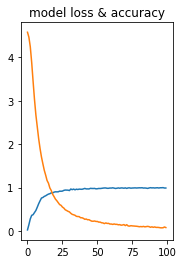

7/7 [==============================] - 0s 3ms/step - loss: 0.2563 - accuracy: 0.9141
[0.25626811385154724, 0.9141414165496826]
Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5902 - accuracy: 0.0202
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5043 - accuracy: 0.0770
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 4.3337 - accuracy: 0.1503
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 4.0464 - accuracy: 0.2008
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 3.6787 - accuracy: 0.2740
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 3.3150 - accuracy: 0.3081
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 3.0172 - accuracy: 0.3396
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 2.7087 - accuracy: 0.4293
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 2.4545 -

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


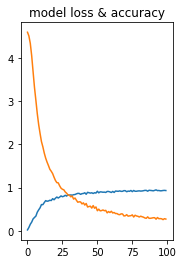

7/7 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9545
[0.2344263195991516, 0.9545454382896423]
Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 4.5865 - accuracy: 0.0215
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 4.5032 - accuracy: 0.0884
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 4.3680 - accuracy: 0.1326
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 4.1354 - accuracy: 0.1540
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 3.8446 - accuracy: 0.1793
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 3.5626 - accuracy: 0.2159
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 3.2657 - accuracy: 0.2727
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 3.0525 - accuracy: 0.2929
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 2.8809 - 

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


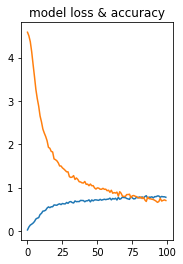

7/7 [==============================] - 0s 3ms/step - loss: 0.3794 - accuracy: 0.8939
[0.37936097383499146, 0.8939393758773804]
Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5944 - accuracy: 0.0101
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5370 - accuracy: 0.0455
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 4.4560 - accuracy: 0.0619
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 4.3004 - accuracy: 0.0985
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 4.1169 - accuracy: 0.1010
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 3.9206 - accuracy: 0.1199
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 3.7387 - accuracy: 0.1288
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 3.5370 - accuracy: 0.1654
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 3.3845 -

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


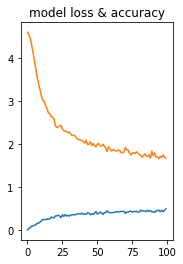

7/7 [==============================] - 0s 3ms/step - loss: 0.7082 - accuracy: 0.8434
[0.7082038521766663, 0.8434343338012695]


In [43]:
dropout_rates=[0,0.1,0.3,0.5,0.7]
for i in dropout_rates:
  training(64,i,0,0.01,20,100)

Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 4.3368 - accuracy: 0.0669
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 2.6860 - accuracy: 0.3232
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 1.5747 - accuracy: 0.5669
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.9459 - accuracy: 0.7386
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.8359
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.8763
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.9141
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2722 - accuracy: 0.9343
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9508
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1694 - accuracy: 0.9621
Epoch 11/

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


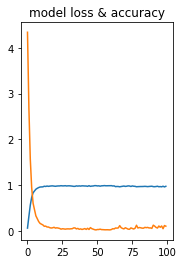

7/7 [==============================] - 0s 4ms/step - loss: 0.8322 - accuracy: 0.8434
[0.8322460055351257, 0.8434343338012695]
Epoch 1/100
13/13 [==============================] - 0s 4ms/step - loss: 4.5408 - accuracy: 0.0391
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 4.0201 - accuracy: 0.1515
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 3.1832 - accuracy: 0.2866
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 2.4278 - accuracy: 0.4520
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 1.8380 - accuracy: 0.6364
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 1.4003 - accuracy: 0.7298
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 1.0778 - accuracy: 0.8093
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.8779 - accuracy: 0.8422
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7259 - 

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


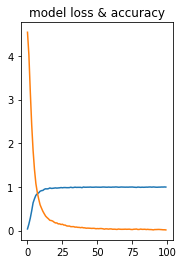

7/7 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.9293
[0.210417240858078, 0.9292929172515869]
Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5797 - accuracy: 0.0354
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 4.4590 - accuracy: 0.1402
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 4.2233 - accuracy: 0.2033
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 3.8605 - accuracy: 0.2298
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 3.4597 - accuracy: 0.2689
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 3.0740 - accuracy: 0.3434
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 2.7256 - accuracy: 0.4583
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 2.4267 - accuracy: 0.5278
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 2.1643 - a

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


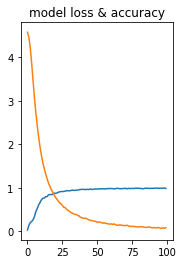

7/7 [==============================] - 0s 3ms/step - loss: 0.3259 - accuracy: 0.9141
[0.3258844316005707, 0.9141414165496826]
Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5954 - accuracy: 0.0101
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5934 - accuracy: 0.0139
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5913 - accuracy: 0.0164
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5896 - accuracy: 0.0227
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5877 - accuracy: 0.0290
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5859 - accuracy: 0.0429
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5836 - accuracy: 0.0492
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5819 - accuracy: 0.0530
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 4.5796 - 

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


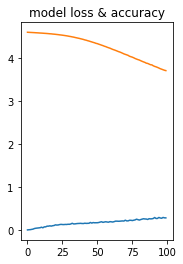

7/7 [==============================] - 0s 3ms/step - loss: 3.8301 - accuracy: 0.1616
[3.8301026821136475, 0.16161616146564484]


In [44]:
learning_rates=[0.1,0.03,0.01,0.0003]
for i in learning_rates:
  training(64,0.1,0,i,20,100)

Epoch 1/100
13/13 [==============================] - 1s 6ms/step - loss: 4.5793 - accuracy: 0.0429
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 4.4643 - accuracy: 0.1856
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 4.2309 - accuracy: 0.2500
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 3.8454 - accuracy: 0.3093
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 3.4065 - accuracy: 0.3775
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 2.9998 - accuracy: 0.4205
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 2.6545 - accuracy: 0.4823
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 2.3538 - accuracy: 0.5593
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 2.0955 - accuracy: 0.5922
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 1.8941 - accuracy: 0.6604
Epoch 11/

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


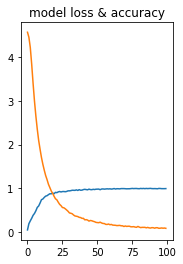

7/7 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.9192
[0.2962287664413452, 0.9191918969154358]


In [45]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
training(64,0.1,0,lr_schedule,20,100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 4.5403 - accuracy: 0.0341 
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 3.9733 - accuracy: 0.1528
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 3.0633 - accuracy: 0.3409
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 2.2952 - accuracy: 0.4836
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 1.7391 - accuracy: 0.6402
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 1.3133 - accuracy: 0.7513
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 1.0666 - accuracy: 0.8005
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.8508 - accuracy: 0.8434
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.7182 - accuracy: 0.8699
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6097 - accuracy: 0.8977
Epoch 11

<ipython-input-38-6a6e402f61fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


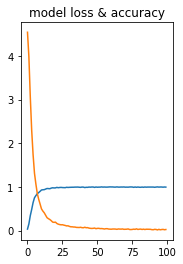

7/7 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.9444
[0.24768000841140747, 0.9444444179534912]


In [51]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.03,
    decay_steps=100000,
    decay_rate=0.9)
training(64,0.1,0,lr_schedule,20,100)